# Efficiently searching for optimal tuning parameters

## Agenda

- How can K-fold cross-validation be used to search for an **optimal tuning parameter**?
- How can this process be made **more efficient**?
- How do you search for **multiple tuning parameters** at once?
- What do you do with those tuning parameters before making **real predictions**?
- How can the **computational expense** of this process be reduced?

## Review of K-fold cross-validation

Steps for cross-validation:

- Dataset is split into K "folds" of **equal size**
- Each fold acts as the **testing set** 1 time, and acts as the **training set** K-1 times
- **Average testing performance** is used as the estimate of out-of-sample performance

Benefits of cross-validation:

- More **reliable** estimate of out-of-sample performance than train/test split
- Can be used for selecting **tuning parameters**, choosing between **models**, and selecting **features**

Drawbacks of cross-validation:

- Can be computationally **expensive**

## Review of parameter tuning using `cross_val_score`

**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

In [0]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')

dfEduInstituteGroup = pd.get_dummies(df['Max_EduInstituteGroup'], prefix='Max_EduInstituteGroup')
dfHireTypeGroup = pd.get_dummies(df['HireType'], prefix='HireType')
dfHireSourceGroup = pd.get_dummies(df['HireSourceGroup'], prefix='HireSourceGroup')

#df = df.drop(['EduInstituteGroup','HireTypeGroup','HireSourceGroup'], axis=1)

df = pd.concat([df, dfEduInstituteGroup,dfHireTypeGroup,dfHireSourceGroup], axis=1)



from sklearn.model_selection import train_test_split

df_train = df[ df['ActionYear'] < 2017]
df_train.shape

df_test = df[ df['ActionYear'] >= 2017]
df_test.shape


df_train_variable = df_train.drop(['SerialNumber','ActionYear','Leave','Max_EduInstituteGroup','HireType','HireSourceGroup'],axis=1)
df_train_label = df_train['Leave']

df_test_variable = df_test.drop(['SerialNumber','ActionYear','Leave','Max_EduInstituteGroup','HireType','HireSourceGroup'],axis=1)
df_test_label = df_test['Leave']



#X_train, X_test, y_train, y_test = train_test_split(df_variable, df_label, test_size=0.30, random_state=101)
#X_train, X_test, y_train, y_test = df_train_variable, df_test_variable, df_train_label, df_test_label


X = df_train_variable
y = df_train_label

In [28]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.54022989 0.80747126 0.84770115 0.88505747 0.74927954 0.79190751
 0.66763006 0.5982659  0.63294798 0.61271676]


In [29]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.7133207517112327


In [30]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7167383011114755, 0.7028895559133528, 0.7296768125740398, 0.6992054105378888, 0.7133207517112327, 0.7052589974107247, 0.72970506426086, 0.7067140598047331, 0.7280041805986446, 0.7145042542196111, 0.7185322162093646, 0.7070495856834123, 0.7282815612316778, 0.7165323395173029, 0.7202380637819884, 0.7009743959873604, 0.7078767493117062, 0.701267563483005, 0.7024095165773546, 0.6992535848815278, 0.7035655811547175, 0.6963683897419284, 0.7029891979182403, 0.6998241330102053, 0.7009685656663598, 0.7009760378593666, 0.7041477468442071, 0.6995375952309697, 0.7006828607901243, 0.6983798552740088]


Text(0,0.5,'Cross-Validated Accuracy')

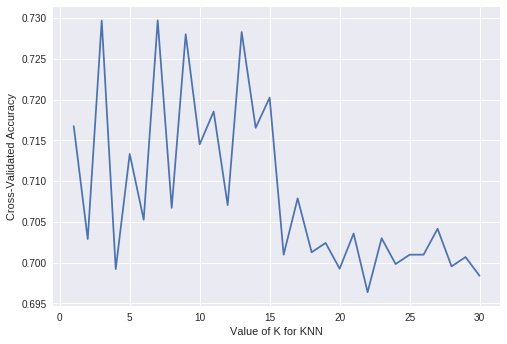

In [31]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## More efficient parameter tuning using `GridSearchCV`

Allows you to define a **grid of parameters** that will be **searched** using K-fold cross-validation

In [0]:
from sklearn.grid_search import GridSearchCV

In [33]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [34]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [0]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

- You can set **`n_jobs = -1`** to run computations in parallel (if supported by your computer and OS)

In [36]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [37]:
# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.71692, std: 0.10145, params: {'n_neighbors': 1},
 mean: 0.70308, std: 0.11953, params: {'n_neighbors': 2},
 mean: 0.72989, std: 0.10333, params: {'n_neighbors': 3},
 mean: 0.69934, std: 0.13303, params: {'n_neighbors': 4},
 mean: 0.71346, std: 0.11214, params: {'n_neighbors': 5},
 mean: 0.70539, std: 0.13304, params: {'n_neighbors': 6},
 mean: 0.72989, std: 0.10005, params: {'n_neighbors': 7},
 mean: 0.70683, std: 0.12364, params: {'n_neighbors': 8},
 mean: 0.72816, std: 0.09897, params: {'n_neighbors': 9},
 mean: 0.71462, std: 0.11618, params: {'n_neighbors': 10},
 mean: 0.71865, std: 0.11309, params: {'n_neighbors': 11},
 mean: 0.70712, std: 0.13933, params: {'n_neighbors': 12},
 mean: 0.72845, std: 0.09839, params: {'n_neighbors': 13},
 mean: 0.71663, std: 0.12263, params: {'n_neighbors': 14},
 mean: 0.72038, std: 0.11060, params: {'n_neighbors': 15},
 mean: 0.70107, std: 0.13368, params: {'n_neighbors': 16},
 mean: 0.70799, std: 0.13647, params: {'n_neighbors': 17},
 mean:

In [38]:
# examine the first tuple
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[0.66091954 0.83045977 0.83333333 0.84482759 0.74639769 0.80346821
 0.66184971 0.60693642 0.61271676 0.56647399]
0.7169213029691553


In [39]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.7169213029691553, 0.7030844623810897, 0.729893341020467, 0.6993369847218218, 0.7134620928221389, 0.7053906024791006, 0.729893341020467, 0.7068319400403574, 0.7281637359469588, 0.7146151628711445, 0.7186509080426636, 0.7071202075526088, 0.7284520034592101, 0.716633035456904, 0.7203805131161718, 0.7010665897953301, 0.7079850100893629, 0.7013548573075814, 0.702507927356587, 0.6993369847218218, 0.7036609974055924, 0.6964543095993082, 0.7030844623810897, 0.6999135197463245, 0.7010665897953301, 0.7010665897953301, 0.7042375324300951, 0.6996252522340732, 0.7007783222830787, 0.6984721821850678]


Text(0,0.5,'Cross-Validated Accuracy')

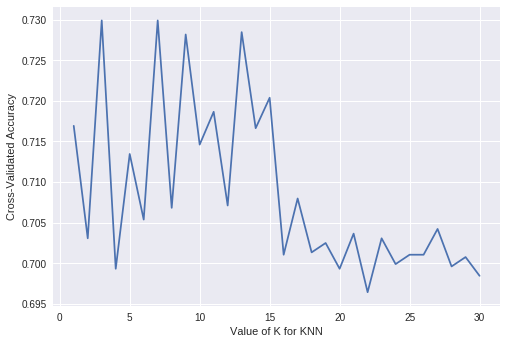

In [40]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [41]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.729893341020467
{'n_neighbors': 3}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
